In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
data = pd.read_csv('/content/spam.csv', encoding='latin-1')
data = data[['v1', 'v2']]
data.columns = ['label', 'message']

In [ ]:
data.drop_duplicates(inplace=True)

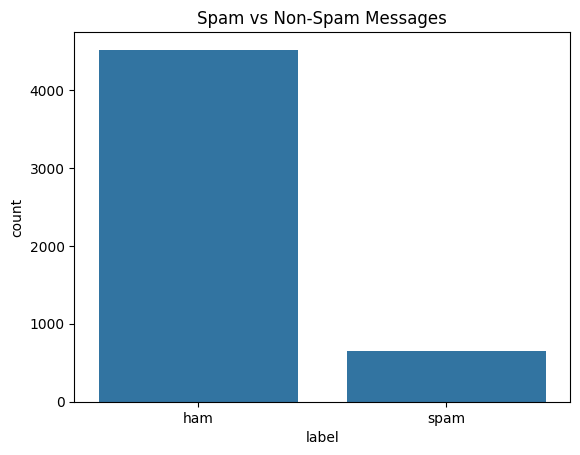

In [ ]:
sns.countplot(x='label', data=data)
plt.title('Spam vs Non-Spam Messages')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['message'])
y = data['label'].map({'ham': 0, 'spam': 1})

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = model.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))

Accuracy: 0.9555125725338491
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       889
           1       1.00      0.68      0.81       145

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.95      1034

